## Importación de librerías

In [1]:
# Librerías estándar
import os
import warnings

# Manipulación de datos
import pandas as pd
import numpy as np

# Configuración de warnings
warnings.filterwarnings('ignore')

# Análisis de nulos
import missingno as msno

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Textos
import unicodedata
#!pip install fuzzywuzzy
#from fuzzywuzzy import process
import re

In [2]:
!pip install fuzzywuzzy

In [3]:
from fuzzywuzzy import process

In [4]:
import sys

sys.path.append(r"C:/Users/helenacaro/Desktop/Fintech/")

import Sesion3_funciones_resuelta as fun

## Carga de datos



In [5]:
path = '/Users/helenacaro/Desktop/Fintech/data/'

# 2. Lista todos los archivos del directorio
lista = os.listdir(path)

# 3. Filtra solo los archivos .csv (opcional)
csv_files = [file for file in lista if (file.endswith('.csv') | file.endswith('.xlsx'))]

csv_files = sorted(csv_files)
csv_files

['bank-additional_bank-additional-full.xlsx']

In [6]:
diccionario_datos = {}

for file in csv_files:
  ruta = os.path.join(path, file)

  if file.endswith('.xlsx'):
    df = pd.read_excel(ruta)
  elif file.endswith('.csv'):
    df = pd.read_csv(ruta, sep = ';')  # o read_excel(), etc.

  key = file.split('.')[0]
  #key = file.split('t_')[1].split('.')[0]
  diccionario_datos[key] = df
  print(f"{key}: {df.shape}")  # ejemplo: mostrar nombre y dimensiones

bank-additional_bank-additional-full: (41188, 21)


## Exploración inicial de los datos



## Analizar columnas

In [7]:
#dict_analizar_columnas = {}

#for k, v in diccionario_datos.items():
  #print(k.upper())
  #print('#' * 90)
  #df_aux = analizar_columnas(v)
  #df_aux['Fuente'] = k

  #df_aux.reset_index(inplace = True)
  #df_aux.rename(columns={'index': 'Columna'}, inplace = True)

  #order_columns = ['Fuente', 'Columna', 'Tipo', 'Num_nulos', 'Pct_nulos', 'Valores']
  #df_aux = df_aux[order_columns]

  #dict_analizar_columnas[k] = df_aux
  #print('#' * 90)
  # crear una variable 'Fuente' cuyo valor sea la k y almancenar el dataframe resultante en dict_analizar_columnas

In [8]:
#v.head()

In [9]:
df = fun.leer_archivo(ruta)

# Exploración inicial de datos

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 41,188 filas y 21 columnas.
##########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y
0,56,housemaid,married,"basic,4y",no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,"high,school",unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,"high,school",no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,"admin,",married,"basic,6y",no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,"high,school",no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


----------------------------------------------------------------------------------------------------
¿Cuáles son las últimas cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y
41183,73,retired,married,"professional,course",no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,yes
41184,46,blue-collar,married,"professional,course",no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,no
41185,56,retired,married,"university,degree",no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,no
41186,44,technician,married,"professional,course",no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,yes
41187,74,retired,married,"professional,course",no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94767.0,-50.8,1028.0,4963.6,no


----------------------------------------------------------------------------------------------------
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y
23186,44,technician,married,"professional,course",no,no,no,cellular,aug,tue,...,6,999,0,nonexistent,1.4,93444.0,-36.1,4965.00,5228.1,no
18951,49,"admin,",divorced,"professional,course",no,yes,yes,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93444.0,-36.1,4.97,5228.1,no
21290,33,unemployed,divorced,"professional,course",no,yes,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93444.0,-36.1,4963.00,5228.1,no
24074,30,technician,married,"professional,course",no,yes,no,telephone,nov,wed,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4663.00,5195.8,no
19204,58,retired,married,"university,degree",unknown,yes,yes,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93444.0,-36.1,4967.00,5228.1,no


----------------------------------------------------------------------------------------------------
¿Cuáles son las columnas del conjunto de datos?
	- age
	- job
	- marital
	- education
	- default
	- housing
	- loan
	- contact
	- month
	- day_of_week
	- duration
	- campaign
	- pdays
	- previous
	- poutcome
	- emp,var,rate
	- cons,price,idx
	- cons,conf,idx
	- euribor3m
	- nr,employed
	- y
----------------------------------------------------------------------------------------------------
¿Cuál es el tipo de datos de cada columna?
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx    float64
cons,conf,idx     flo

,0
age,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,"[housemaid, services, admin,, blue-collar, tec..."
marital,"[married, single, divorced, unknown]"
education,"[basic,4y, high,school, basic,6y, basic,9y, pr..."
default,"[no, unknown, yes]"
housing,"[no, yes, unknown]"
loan,"[no, yes, unknown]"
contact,"[telephone, cellular]"
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,"[mon, tue, wed, thu, fri]"


----------------------------------------------------------------------------------------------------
¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y
count,41188.0,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.0,41188.0,41188.0,41188,41188.0,41188.0,41188.0,41188.0,41188.0,41188
unique,,12,4,8,3,3,3,2,10,5,...,,,,3,,,,,,2
top,,"admin,",married,"university,degree",no,yes,no,cellular,may,thu,...,,,,nonexistent,,,,,,no
freq,,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,,,,35563,,,,,,36548
mean,40.02406,,,,,,,,,,...,2.567593,962.475454,0.172963,,0.081886,85401.579955,-40.5026,3180.107207,5167.035911,
std,10.42125,,,,,,,,,,...,2.770014,186.910907,0.494901,,1.57096,26471.506796,4.628198,2086.690436,72.251528,
min,17.0,,,,,,,,,,...,1.0,0.0,0.0,,-3.4,93.2,-50.8,0.634,4963.6,
25%,32.0,,,,,,,,,,...,1.0,999.0,0.0,,-1.8,92893.0,-42.7,1281.0,5099.1,
50%,38.0,,,,,,,,,,...,2.0,999.0,0.0,,1.1,93749.0,-41.8,4856.0,5191.0,
75%,47.0,,,,,,,,,,...,3.0,999.0,0.0,,1.4,93994.0,-36.4,4961.0,5228.1,


----------------------------------------------------------------------------------------------------
¿Cuántos valores nulos hay en cada columna del DataFrame?


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp,var,rate      0
cons,price,idx    0
cons,conf,idx     0
euribor3m         0
nr,employed       0
y                 0
dtype: int64

----------------------------------------------------------------------------------------------------
¿Cuál es el porcentaje de valores nulos por columna, ordenado de mayor a menor?


,Col,pct
0,age,0.0
1,campaign,0.0
2,"nr,employed",0.0
3,euribor3m,0.0
4,"cons,conf,idx",0.0
5,"cons,price,idx",0.0
6,"emp,var,rate",0.0
7,poutcome,0.0
8,previous,0.0
9,pdays,0.0


----------------------------------------------------------------------------------------------------
## Valores nulos: Visualización


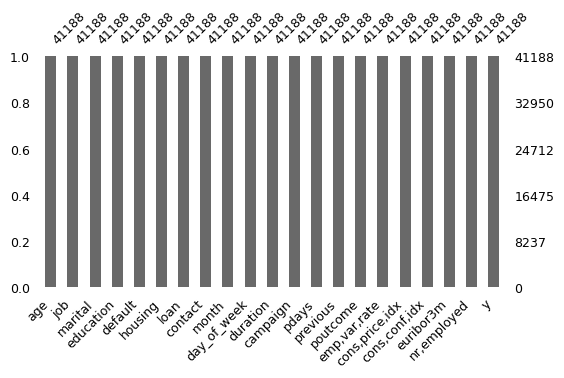

----------------------------------------------------------------------------------------------------
## Visualización de patrones en valores nulos


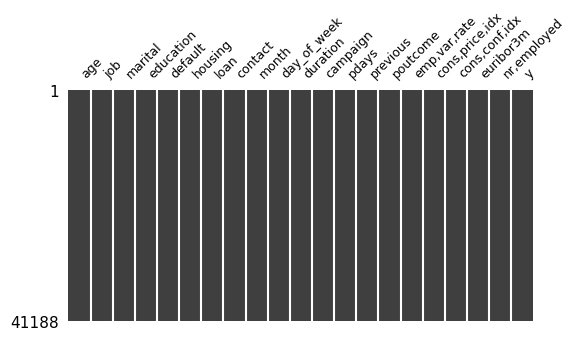

----------------------------------------------------------------------------------------------------


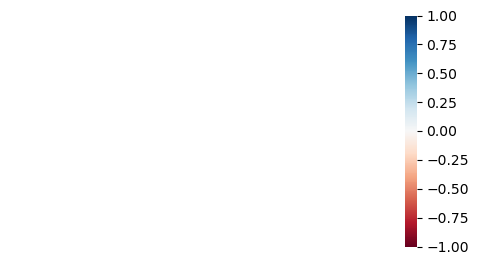

----------------------------------------------------------------------------------------------------
##########################################################################################


In [10]:
fun.exploracion_inicial(df)

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y
0,56,housemaid,married,"basic,4y",no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,"high,school",unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,"high,school",no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,"admin,",married,"basic,6y",no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,"high,school",no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


In [12]:
df.select_dtypes(include= 'number')

,age,duration,campaign,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed"
0,56,261,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
1,57,149,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
2,37,226,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
3,40,151,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
4,56,307,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94767.0,-50.8,1028.0,4963.6
41184,46,383,1,999,0,-1.1,94767.0,-50.8,1028.0,4963.6
41185,56,189,2,999,0,-1.1,94767.0,-50.8,1028.0,4963.6
41186,44,442,1,999,0,-1.1,94767.0,-50.8,1028.0,4963.6


In [13]:
df.select_dtypes(exclude= 'number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,"basic,4y",no,no,no,telephone,may,mon,nonexistent,no
1,services,married,"high,school",unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,"high,school",no,yes,no,telephone,may,mon,nonexistent,no
3,"admin,",married,"basic,6y",no,no,no,telephone,may,mon,nonexistent,no
4,services,married,"high,school",no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,"professional,course",no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,"professional,course",no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,"university,degree",no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,"professional,course",no,no,no,cellular,nov,fri,nonexistent,yes


In [14]:
orden_dias = ["mon", "tue", "wed", "thu", "fri"]
orden_meses = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

In [15]:
df["day_of_week"] = pd.Categorical(df["day_of_week"], categories=orden_dias, ordered=True)
df["month"] = pd.Categorical(df["month"], categories=orden_meses, ordered=True)

## Datos clientes

In [16]:
def graficar_barras_relativo_px(df, variable_analisis):
    orden_dias = ["mon", "tue", "wed", "thu", "fri"]
    orden_meses = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

    # asigno orden solo si la variable lo necesita
    if variable_analisis == "month":
        orden = orden_meses
    elif variable_analisis == "day_of_week":
        orden = orden_dias
    else:
        orden = None

    # conteos
    counts = df[variable_analisis].value_counts(dropna=False)

    if orden is not None:
        counts = counts.reindex(orden, fill_value=0)

    volumen = counts.reset_index()
    volumen.columns = [variable_analisis, "Frecuencia"]
    volumen["Porcentaje"] = (volumen["Frecuencia"] / volumen["Frecuencia"].sum()) * 100
    volumen["Texto"] = volumen.apply(lambda r: f'{int(r["Frecuencia"])} ({r["Porcentaje"]:.2f}%)', axis=1)

    fig = px.bar(volumen, x=variable_analisis, y="Porcentaje", text="Texto")
    fig.update_traces(texttemplate="%{text}", textposition="outside")

    if orden is not None:
        fig.update_layout(xaxis={"categoryorder": "array", "categoryarray": orden})

    fig.update_layout(
        title_text=f"Gráfico de barras relativo: {variable_analisis}",
        xaxis_title=variable_analisis,
        yaxis_title="Porcentaje",
        plot_bgcolor="white",
    )
    fig.update_xaxes(showgrid=True, gridcolor="lightgrey")
    fig.update_yaxes(showgrid=True, gridcolor="lightgrey")

    fig.show()


In [17]:
cols_clientes = ["job", "marital", "education", "default", "housing", "loan"]

In [18]:
datos_clientes = df[cols_clientes].copy() 

In [19]:
columnas_categoricas = datos_clientes.columns.tolist()

In [20]:
for col in columnas_categoricas:
    graficar_barras_relativo_px(datos_clientes, col)

## Datos campañas

In [21]:
campana_actual_cat = ["contact", "month", "day_of_week"]     # categóricas
campana_actual_num = ["duration", "campaign"]               # numéricas

In [22]:
campana_previa_cat = ["poutcome"]                           # categóricas
campana_previa_num = ["pdays", "previous"]                  # numéricas

In [23]:
resultado = ["y"]

In [24]:
df_base = df

In [25]:
df_campana_actual = df_base[campana_actual_cat + campana_actual_num + resultado].copy()
df_campana_previa = df_base[campana_previa_cat + campana_previa_num + resultado].copy()

### Campaña actual

In [26]:
for col in campana_actual_cat:
    graficar_barras_relativo_px(df_campana_actual, col)

### Campaña previa

In [27]:
for col in campana_previa_cat:
    graficar_barras_relativo_px(df_campana_previa, col)

### Resultado general

In [28]:
graficar_barras_relativo_px(df, "y")

In [29]:
def graficar_barras_resultado_por_categoria(df, variable, target="y", modo="stack",
                                           orden_meses=None, orden_dias=None):
    # Frecuencia por (categoria, resultado)
    tabla = (
        df.groupby([variable, target])
          .size()
          .reset_index(name="Frecuencia")
    )

    # Porcentaje dentro de cada categoría
    tabla["Porcentaje"] = (
        tabla.groupby(variable)["Frecuencia"]
             .transform(lambda x: x / x.sum() * 100)
    )

    # Texto Frecuencia + Porcentaje
    tabla["Texto"] = tabla.apply(
        lambda r: f'{int(r["Frecuencia"])} ({r["Porcentaje"]:.2f}%)', axis=1
    )

    # Si quiero orden natural, preparo el orden en la tabla (para no depender de plotly)
    if variable == "month" and orden_meses is not None:
        tabla[variable] = pd.Categorical(tabla[variable], categories=orden_meses, ordered=True)
        tabla = tabla.sort_values(variable)
    elif variable == "day_of_week" and orden_dias is not None:
        tabla[variable] = pd.Categorical(tabla[variable], categories=orden_dias, ordered=True)
        tabla = tabla.sort_values(variable)

    # Gráfico
    fig = px.bar(
        tabla,
        x=variable,
        y="Porcentaje",
        color=target,
        text="Texto",
        barmode=("stack" if modo == "stack" else "group")
    )

    fig.update_traces(texttemplate="%{text}", textposition="outside")

    # Orden del eje X: natural para mes/día, y por volumen para el resto
    if variable == "month" and orden_meses is not None:
        fig.update_layout(xaxis={"categoryorder": "array", "categoryarray": orden_meses})
    elif variable == "day_of_week" and orden_dias is not None:
        fig.update_layout(xaxis={"categoryorder": "array", "categoryarray": orden_dias})
    else:
        fig.update_layout(xaxis={"categoryorder": "total descending"})

    fig.update_layout(
        title_text=f"Resultado ({target}) por {variable}",
        xaxis_title=variable,
        yaxis_title="Porcentaje dentro de la categoría",
        plot_bgcolor="white",
    )
    fig.update_xaxes(showgrid=True, gridcolor="lightgrey")
    fig.update_yaxes(showgrid=True, gridcolor="lightgrey")

    fig.show()


## Análisis del target con todas las variables del dataset

### Variables campaña actual vs target sin orden

In [30]:
cols_cat_actual = ["contact", "month", "day_of_week"]
cols_cat_previa = ["poutcome"]

for col in cols_cat_actual:
    graficar_barras_resultado_por_categoria(df, col, target="y", modo="stack")

### Variable campaña previa vs target

In [31]:
for col in cols_cat_previa:
    graficar_barras_resultado_por_categoria(df, col, target="y", modo="stack")

### Campaña actual vs target con media y datos ordenados

In [32]:
def graficar_barras_resultado_por_categoria(
    df, 
    variable, 
    target="y", 
    modo="stack",
    media_conversion=None  # si es None, se calcula sola
):
    orden_dias = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
    orden_meses = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

    # 1) Media global dinámica (si no me la pasan)
    if media_conversion is None:
        media_conversion = (df[target].astype(str).str.lower().eq("yes").mean()) * 100

    # Frecuencia por (categoria, resultado)
    tabla = (
        df.groupby([variable, target])
          .size()
          .reset_index(name="Frecuencia")
    )

    # Porcentaje dentro de cada categoría
    tabla["Porcentaje"] = (
        tabla.groupby(variable)["Frecuencia"]
             .transform(lambda x: x / x.sum() * 100)
    )

    tabla["Texto"] = tabla.apply(
        lambda r: f'{int(r["Frecuencia"])} ({r["Porcentaje"]:.2f}%)', axis=1
    )

    # Orden X para mes/día
    if variable == "day_of_week":
        tabla[variable] = pd.Categorical(tabla[variable], categories=orden_dias, ordered=True)
        tabla = tabla.sort_values(variable)
        xaxis_order = {"categoryorder": "array", "categoryarray": orden_dias}
    elif variable == "month":
        tabla[variable] = pd.Categorical(tabla[variable], categories=orden_meses, ordered=True)
        tabla = tabla.sort_values(variable)
        xaxis_order = {"categoryorder": "array", "categoryarray": orden_meses}
    else:
        xaxis_order = {"categoryorder": "total descending"}

    # Gráfico (orden apilado y colores suaves)
    fig = px.bar(
        tabla,
        x=variable,
        y="Porcentaje",
        color=target,
        text="Texto",
        barmode=("stack" if modo == "stack" else "group"),
        category_orders={target: ["yes", "no"]},
        color_discrete_map={"yes": "#EF553B", "no": "#636EFA"}
    )

    # 2) Línea media sin anotación dentro (solo la línea)
    fig.add_hline(
        y=media_conversion,
        line_dash="dash",
        line_color="black"
    )

    # 3) Anotación fuera del área del gráfico (arriba a la izquierda)
    fig.add_annotation(
        x=0, xref="paper",
        y=1.08, yref="paper",
        text=f"Media global: {media_conversion:.2f}%",
        showarrow=False,
        align="left"
    )

    fig.update_traces(texttemplate="%{text}", textposition="outside")
    fig.update_layout(
        title_text=f"Resultado ({target}) por {variable}",
        xaxis_title=variable,
        yaxis_title="Porcentaje dentro de la categoría",
        xaxis=xaxis_order,
        plot_bgcolor="white",
        margin=dict(t=90)  # deja espacio arriba para la anotación
    )
    fig.update_xaxes(showgrid=True, gridcolor="lightgrey")
    fig.update_yaxes(showgrid=True, gridcolor="lightgrey")

    fig.show()


In [33]:
cols_cat_actual = ["contact", "month", "day_of_week"]
cols_cat_previa = ["poutcome"]

for col in cols_cat_actual:
    graficar_barras_resultado_por_categoria(df, col, target="y", modo="stack")

#### Interpretación: Resultado (y) por `contact` (con media global)

Este gráfico muestra la proporción de clientes que **contratan (yes, rojo)** vs **no contratan (no, azul)** según el tipo de contacto (`cellular` vs `telephone`).

**Línea discontinua (media global):**
- La línea negra representa la **tasa de conversión global del dataset: 11.27%**.
- Sirve como referencia para ver qué categorías están **por encima** o **por debajo** de la media.

**Qué se observa:**
- **`cellular`** tiene una conversión de **14.74% (3,853 yes)** → está **por encima** de la media global (11.27%).
- **`telephone`** tiene una conversión de **5.23% (787 yes)** → está **por debajo** de la media global.

**Conclusión rápida:**
- El canal **`cellular`** se asocia con **mejor rendimiento** (mayor probabilidad de “yes”) que `telephone`.
- `contact` parece ser una variable relevante para explicar diferencias en conversión.

**Nota de contexto:**
- Es un análisis descriptivo: no prueba causalidad. La diferencia puede depender de segmentación, timing o estrategia de contacto.


#### Interpretación: Resultado (y) por `month` (con media global)

Este gráfico muestra la proporción de **contratación (yes, rojo)** vs **no contratación (no, azul)** para cada mes.  
La línea discontinua marca la **media global de conversión (11.27%)** y sirve como referencia.

**Qué se observa (patrones claros):**
- Hay meses con conversión **muy por encima** de la media:
  - **mar (~50.55%)**, **sep (~44.91%)**, **oct (~43.87%)**, **dec (~48.90%)**.
- Hay meses con conversión **claramente por debajo** de la media:
  - **may (~6.43%)**, **jul (~9.05%)**, **nov (~10.14%)** (y también **jun/aug** cerca pero por debajo o muy cerca).
- En meses como **may** el volumen total es alto (muchos contactos), pero la conversión es baja, lo que sugiere que **no solo importa el número de contactos**, sino el contexto del mes.

**Conclusión rápida:**
- `month` parece estar **muy relacionado** con la probabilidad de “yes” (hay estacionalidad marcada).
- Esto podría reflejar factores como timing de campañas, comportamiento del cliente por temporada, o condiciones macroeconómicas asociadas a ciertos meses.

**Nota importante:**
- Para interpretar bien estos picos (mar/sep/oct/dec), conviene mirar también el **tamaño de muestra por mes (n)**, porque meses con poca muestra pueden mostrar porcentajes extremos.


#### Interpretación: Resultado (y) por `day_of_week` (con media global)

Este gráfico compara la proporción de **contratación (yes, rojo)** vs **no contratación (no, azul)** según el día de la semana (`mon` a `fri`).  
La línea discontinua marca la **media global de conversión (11.27%)**.

**Qué se observa:**
- Las tasas de conversión están **bastante estables** entre días (no hay diferencias grandes).
- Días **ligeramente por encima** de la media:
  - **thu ~12.12%**, **tue ~11.78%**, **wed ~11.67%**.
- Días **por debajo** de la media:
  - **mon ~9.95%** (el más bajo), **fri ~10.81%**.

**Conclusión rápida:**
- `day_of_week` parece tener un **impacto moderado/bajo** en la conversión: hay pequeñas variaciones, pero no cambios fuertes.
- Si se tuviera que priorizar por rendimiento, **jueves** (y después martes/miércoles) aparece como el mejor día, mientras que **lunes** es el más flojo.

**Nota importante:**
- Aunque la diferencia es pequeña, puede ser útil combinar `day_of_week` con otras variables (por ejemplo `month` o `contact`) para ver si existen patrones más claros por segmentos.


### Campaña previa vs target con media y datos ordenados

In [34]:
for col in cols_cat_previa:
    graficar_barras_resultado_por_categoria(df, col, target="y", modo="stack")

#### Interpretación: Resultado (y) por `poutcome` (campaña previa)

Este gráfico muestra cómo cambia la probabilidad de **contratación (yes, rojo)** según el resultado de la **campaña previa** (`poutcome`).  
La línea discontinua marca la **media global de conversión (11.27%)**.

**Qué se observa (tasa de conversión “yes” dentro de cada categoría):**
- **success → 65.11% (894 casos)**  
  Es una conversión **muy superior** a la media global. Si una persona ya tuvo “éxito” en una campaña anterior, es mucho más probable que vuelva a contratar.
- **failure → 14.23% (605 casos)**  
  Está **ligeramente por encima** de la media global, pero lejos del nivel de “success”. Indica que “fallar” antes no elimina la posibilidad de convertir, aunque no ayuda demasiado.
- **nonexistent → 8.83% (3141 casos)**  
  Está **por debajo** de la media global. Son clientes sin resultado previo registrado (o sin campaña previa), y su probabilidad de contratación es menor.

**Conclusión rápida:**
- `poutcome` es una de las variables más informativas: el histórico de campaña previa **marca mucha diferencia**.
- En términos de negocio, el segmento **poutcome=success** es “prioridad alta” porque convierte muchísimo más.

**Nota importante (para no interpretar mal):**
- `poutcome` describe el resultado de una campaña anterior, y **no es lo mismo** que el target `y` (resultado de esta campaña).  
  Por eso puede existir `poutcome=failure` y aun así `y=yes` en la campaña actual: falló antes, pero ahora sí contrata.


In [35]:
pd.crosstab(df["poutcome"], df["y"])

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [36]:
pd.crosstab(df["poutcome"], df["y"], normalize="index") * 100

y,no,yes
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


### Variables clientes vs target

In [37]:
cols_clientes = ["job", "marital", "education", "default", "housing", "loan", "age", "y"]

In [38]:
df_clientes = df[cols_clientes].copy()

In [39]:
df_clientes

,job,marital,education,default,housing,loan,age,y
0,housemaid,married,"basic,4y",no,no,no,56,no
1,services,married,"high,school",unknown,no,no,57,no
2,services,married,"high,school",no,yes,no,37,no
3,"admin,",married,"basic,6y",no,no,no,40,no
4,services,married,"high,school",no,no,yes,56,no
...,...,...,...,...,...,...,...,...
41183,retired,married,"professional,course",no,yes,no,73,yes
41184,blue-collar,married,"professional,course",no,no,no,46,no
41185,retired,married,"university,degree",no,yes,no,56,no
41186,technician,married,"professional,course",no,no,no,44,yes


In [40]:
cols_cat_clientes = ["job", "marital", "education", "default", "housing", "loan"]
cols_cat_clientes = [c for c in cols_cat_clientes if c in df_clientes.columns]
for col in cols_cat_clientes:
    graficar_barras_resultado_por_categoria(df_clientes, col, target="y", modo="stack")

#### Interpretación: Resultado (y) por `job`

Este gráfico compara la **tasa de conversión (yes, rojo)** entre distintos tipos de **ocupación** (`job`).  
La línea discontinua marca la **media global de conversión (11.27%)**, así que nos sirve como referencia para ver qué grupos convierten por encima o por debajo del promedio.

**Hallazgos principales (qué categorías destacan):**
- **student → 31.43%**  
  Es la categoría con **mayor conversión**, muy por encima de la media. Indica que, en este dataset, los estudiantes son un segmento especialmente propenso a contratar.
- **retired → 25.23%**  
  También presenta una conversión **muy alta**. Los jubilados aparecen como otro perfil con probabilidad elevada de contratación.
- **unemployed → 14.20%** y **admin. → 12.97%**  
  Están **ligeramente por encima** de la media global, con un rendimiento moderadamente bueno.
- **blue-collar → 6.89%**, **services → 8.14%**, **entrepreneur → 8.52%**  
  Son perfiles con conversión **por debajo de la media**, por lo que (en este dataset) parecen menos propensos a contratar.

**Conclusión rápida:**
- La variable `job` sí parece aportar señal: hay diferencias claras de conversión entre ocupaciones.
- Para decisiones de campaña, **student** y **retired** serían perfiles “prioritarios” (alta conversión), mientras que **blue-collar / services / entrepreneur** podrían requerir un enfoque distinto (mensaje, oferta o canal) porque convierten menos.

**Nota de cautela (importante):**
- Algunas categorías pueden tener **tamaños de muestra distintos**. Si un grupo tiene pocos casos, su porcentaje puede ser más inestable. Por eso conviene mirar también el volumen de cada categoría antes de sacar conclusiones definitivas.


#### Interpretación: Resultado (y) por `marital`

Este gráfico compara la **tasa de conversión (yes, rojo)** según el **estado civil** (`marital`).  
La línea discontinua representa la **media global de conversión (11.27%)**, que usamos como referencia.

**Qué se observa (comparado con la media):**
- **single → 14.00%**  
  Conversión **por encima de la media**. Dentro de este dataset, las personas solteras muestran mayor probabilidad de contratar que el promedio.
- **married → 10.16%** y **divorced → 10.32%**  
  Conversión **ligeramente por debajo de la media**. La diferencia existe, pero no es muy grande.
- **unknown → 15.00%**  
  Conversión aparentemente **alta**, pero hay que interpretarlo con cautela porque el **tamaño de muestra es muy pequeño** (se ve un volumen muy bajo), así que el porcentaje puede ser inestable.

**Conclusión rápida:**
- `marital` aporta **algo de señal**, pero las diferencias son **moderadas**.
- El grupo **single** destaca como el segmento más favorable (con diferencia clara vs media).
- El grupo **unknown** no lo tomaría como insight sólido sin confirmar primero el volumen (n) y, si es posible, revisar si hay sesgo en ese registro.

**Idea accionable (si esto fuera una campaña):**
- Priorizar / testar mensajes para **single**, y mantener el resto como baseline porque las diferencias entre **married** y **divorced** son pequeñas.


#### Interpretación: Resultado (y) por `education`

Este gráfico muestra la **tasa de conversión (yes, rojo)** según el nivel de **educación** (`education`).  
La línea discontinua marca la **media global de conversión (11.27%)** para comparar cada grupo con el promedio.

**Qué se observa (comparado con la media):**
- **university.degree → 13.72%**  
  Conversión **por encima de la media**. En este dataset, quienes tienen grado universitario presentan mayor probabilidad de contratar.
- **unknown → 14.50%**  
  Conversión alta, pero es un grupo “cajón” (valor faltante/indefinido). Puede esconder perfiles mixtos, así que conviene interpretarlo con cautela.
- **professional.course → 11.35%**  
  Muy cerca de la media (ligeramente por encima). No es un salto grande, pero es consistente.
- **high.school → 10.84%** y **basic.4y → 10.25%**  
  Ligeramente **por debajo** del promedio.
- **basic.6y → 8.20%** y **basic.9y → 7.82%**  
  Conversión **claramente por debajo** de la media: parecen segmentos menos propensos a contratar.
- **illiterate → 22.22%**  
  Ojo: el porcentaje es alto, pero el **tamaño de muestra es mínimo** (se ve muy poco volumen). Esto suele generar porcentajes “inflados” que no son estables.

**Conclusión rápida:**
- Hay una **tendencia general**: a mayor nivel educativo, la conversión tiende a ser **más alta** (destaca `university.degree`), mientras que los niveles `basic.*` tienden a estar **por debajo**.
- Los grupos **`illiterate` y `unknown`** deben tratarse con cautela: uno por **muestra pequeña** y el otro por ser **categoría poco informativa**.

**Idea accionable (si esto fuera una campaña):**
- Segmentar o personalizar mensajes priorizando **`university.degree`** (y quizá `professional.course`), y revisar si los segmentos `basic.*` necesitan un enfoque distinto (mensaje más simple, más confianza/beneficios concretos, etc.).


#### Interpretación: Resultado (y) por `default`

Este gráfico muestra la **tasa de conversión (yes, rojo)** según si el cliente tiene **default (impago)** (`default`).  
La línea discontinua marca la **media global de conversión (11.27%)**.

**Qué se observa (comparado con la media):**
- **default = no → 12.88%**  
  Conversión **por encima de la media**. Es el grupo “más saludable” y además el más informativo (tiene mucho volumen).
- **default = unknown → 5.15%**  
  Conversión **muy por debajo** de la media. Esto suele indicar que “unknown” no es neutro: puede estar capturando perfiles con menos información/peor calidad de registro o clientes menos cualificados.
- **default = yes → 0%**  
  Aquí hay que tener cuidado: aparece **0%** porque el **tamaño de muestra es extremadamente bajo** (se ve que apenas hay casos). Con tan pocos datos, no se puede concluir que “tener default implica 0 conversión”; simplemente no hay evidencia suficiente en esta muestra.

**Conclusión rápida:**
- `default` parece una variable **relevante**, pero sobre todo por la diferencia clara entre **`no`** y **`unknown`**.
- El valor **`unknown`** es una señal de alerta: se asocia a una conversión mucho menor y conviene revisarlo (qué significa exactamente y por qué falta el dato).
- No se puede interpretar el grupo **`yes`** con fiabilidad por el **bajo volumen**.

**Idea accionable (si esto fuera una campaña):**
- Tratar `default=unknown` como un segmento separado (no asumir que se comporta igual que `no`).
- Para modelado, considerar:
  - mantener `unknown` como categoría propia,
  - y revisar si conviene imputar/limpiar esa variable en función del contexto del dataset.


#### Interpretación: Resultado (y) por `housing`

Este gráfico muestra la **tasa de conversión (yes, rojo)** según si el cliente tiene **préstamo hipotecario** (`housing`).  
La línea discontinua marca la **media global de conversión (11.27%)**.

**Qué se observa (comparado con la media):**
- **housing = yes → 11.62%**  
  Conversión **ligeramente por encima** de la media. La diferencia es pequeña, pero sugiere que quienes tienen hipoteca podrían estar **muy ligeramente** más predispuestos a contratar.
- **housing = no → 10.88%**  
  Conversión **ligeramente por debajo** de la media. No es una caída grande, pero queda por debajo del promedio.
- **housing = unknown → 10.81%**  
  Conversión **por debajo** de la media. Aquí conviene ser prudente porque suele ser un grupo menos fiable (y normalmente con menos muestra), por lo que puede representar **falta de información** más que un perfil real.

**Conclusión rápida:**
- `housing` parece una variable con **señal débil**: las tasas están muy cerca entre sí (diferencias pequeñas).
- La lectura más consistente es que **tener hipoteca (yes)** se asocia a una conversión **un poco mejor**, pero no lo suficiente como para considerarlo un driver fuerte por sí solo.
- `unknown` se comporta parecido a `no`, y conviene interpretarlo como una categoría **no neutra** (posible calidad de dato/registro incompleto).

**Idea accionable (si esto fuera una campaña):**
- No segmentaría la estrategia solo por `housing`, pero sí lo usaría como **variable de apoyo** combinada con otras (por ejemplo `loan`, `job`, `age`, `poutcome`).
- Para modelado, mantener `unknown` como categoría separada (no imputarla automáticamente como `no`) y, si es posible, **investigar por qué falta ese dato** (origen del canal, errores de captura, etc).


#### Interpretación: Resultado (y) por `loan`

Este gráfico muestra la **tasa de conversión (yes, rojo)** según si el cliente tiene **préstamo personal** (`loan`).  
La línea discontinua marca la **media global de conversión (11.27%)**.

**Qué se observa (comparado con la media):**
- **loan = no → 11.34%**  
  Conversión **muy ligeramente por encima** de la media. Es el grupo con mayor volumen, por lo que es el más estable para sacar conclusiones.
- **loan = yes → 10.93%**  
  Conversión **ligeramente por debajo** de la media. Sugiere que tener un préstamo personal activo podría estar asociado a una **menor predisposición** a contratar, aunque la diferencia es pequeña.
- **loan = unknown → 10.81%**  
  Conversión **por debajo** de la media. De nuevo, “unknown” suele reflejar **falta de información** o variaciones en la captura del dato, por lo que conviene tratarlo como categoría propia y no como neutra.

**Conclusión rápida:**
- `loan` aporta una señal **débil pero coherente**:  
  el grupo **sin préstamo (no)** convierte algo mejor que quienes **sí tienen préstamo (yes)**.
- Las diferencias son **pequeñas**, así que por sí sola no es una variable “decisiva”, pero sí puede sumar cuando la combines con otras (p. ej., `housing`, `job`, `age`, `poutcome`).

**Idea accionable (si esto fuera una campaña):**
- No tomaría decisiones fuertes solo por `loan`, pero sí lo usaría para **micro-segmentación**:
  - Priorizar (ligeramente) audiencias con `loan=no` si tienes que optimizar presupuesto/tiempo de contacto.
  - Mantener `loan=unknown` separado y revisar si el “unknown” proviene de un canal/captura específica (posible mejora de calidad de datos).
- Para modelado: mantener `unknown` como categoría propia y evaluar interacciones (`loan` + `housing` + variables de campaña).


In [41]:
if "age" in df_clientes.columns:
    # tramos sencillos para que sea más fácil de interpretar
    bins = [17, 25, 35, 45, 55, 65, 120]
    labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]

    df_clientes["age_group"] = pd.cut(df_clientes["age"], bins=bins, labels=labels)

    graficar_barras_resultado_por_categoria(df_clientes, "age_group", target="y", modo="stack")

#### Interpretación: Resultado (y) por `age_group`

Este gráfico muestra la **tasa de conversión (yes, rojo)** según el **grupo de edad** (`age_group`).  
La línea discontinua marca la **media global de conversión (11.27%)**.

**Qué se observa (comparado con la media):**
- **18–25 → 20.89%**  
  Conversión **muy por encima** de la media. Es un segmento joven con alta propensión relativa a contratar.
- **26–35 → 11.72%**  
  Conversión **muy cercana** a la media (ligeramente por encima). Segmento “neutral”.
- **36–45 → 8.51%** y **46–55 → 8.69%**  
  Conversión **por debajo** de la media. Aquí se concentra la parte menos favorable del rango “adulto medio”.
- **56–65 → 15.22%**  
  Conversión **por encima** de la media. Vuelve a subir claramente en edades más altas.
- **66+ → 46.85%**  
  Conversión **extraordinariamente alta** frente a la media. **Ojo**: aunque es un resultado muy llamativo, este grupo tiene **mucho menos volumen** que el resto (se ve por el conteo), así que puede estar inflado por el tamaño de muestra o por un sesgo de selección (p. ej., se contacta a perfiles muy específicos dentro de 66+).

**Conclusión rápida:**
- La relación entre edad y conversión parece **no lineal**:  
  cae en edades intermedias (36–55) y **sube fuerte** en 18–25 y especialmente en 56+.
- `age_group` es una variable **potencialmente muy relevante**, pero el caso de **66+** requiere validación por volumen y posibles sesgos (no asumir causalidad directa).

**Idea accionable (si esto fuera una campaña):**
- Priorizar/optimizar mensajes para segmentos con mejor rendimiento: **18–25** y **56–65**.
- Tratar **66+** como “segmento premium” pero con control:  
  revisar el **tamaño de muestra**, estabilidad por mes/canal, y si hay variables que lo expliquen (p. ej., `contact`, `poutcome`, `campaign`, `duration`).
- Para modelado: mantener `age_group` (o incluso usar `age` numérica con no-linealidad: binning, splines o árboles) porque la señal no parece lineal.


In [42]:
df_clientes.head()

,job,marital,education,default,housing,loan,age,y,age_group
0,housemaid,married,"basic,4y",no,no,no,56,no,56-65
1,services,married,"high,school",unknown,no,no,57,no,56-65
2,services,married,"high,school",no,yes,no,37,no,36-45
3,"admin,",married,"basic,6y",no,no,no,40,no,36-45
4,services,married,"high,school",no,no,yes,56,no,56-65


### Evaluación del impacto de los detalles de la campaña actual

In [43]:
cols_campana = ["campaign", "month", "day_of_week", "contact", "y"]
cols_campana = [c for c in cols_campana if c in df.columns]

df_campana = df[cols_campana].copy()

In [44]:
cols_cat_actual = ["month", "day_of_week", "contact"]
cols_cat_actual = [c for c in cols_cat_actual if c in df_campana.columns]

for col in cols_cat_actual:
    graficar_barras_resultado_por_categoria(df_campana, col, target="y", modo="stack")

In [45]:
if "campaign" in df_campana.columns:
    df_campana["campaign_group"] = df_campana["campaign"].apply(
        lambda x: "1" if x == 1 else ("2" if x == 2 else ("3" if x == 3 else "4+"))
    )

    graficar_barras_resultado_por_categoria(df_campana, "campaign_group", target="y", modo="stack")

#### Interpretación: Resultado (y) por `campaign_group`

Este gráfico muestra la **tasa de conversión (yes, rojo)** según el **número de contactos realizados en la campaña actual** (`campaign_group`: 1, 2, 3, 4+).  
La línea discontinua marca la **media global de conversión (11.27%)**.

**Qué se observa (comparado con la media):**
- **1 contacto → 13.04%**  
  Conversión **por encima** de la media. Cuando se contacta una sola vez, el rendimiento es relativamente alto.
- **2 contactos → 11.46%**  
  Conversión **muy cercana** a la media (ligeramente por encima). Aún se mantiene estable.
- **3 contactos → 10.75%**  
  Conversión **ligeramente por debajo** de la media. Empieza a verse un descenso.
- **4+ contactos → 7.27%**  
  Conversión **claramente por debajo** de la media. Es el peor grupo en términos de rendimiento.

**Lectura lógica (por qué puede pasar):**
- Este patrón suele indicar **“fatiga / baja cualificación”**: cuando una persona necesita muchos intentos, normalmente es porque **no estaba interesada** o **noo no encajaba bien** desde el principio.
- Importante: `campaign` **no es una acción causal limpia** (no significa que “llamar más empeora”). Más bien refleja una **decisión operativa**: los casos difíciles reciben más contactos.

**Conclusión rápida:**
- Hay una **relación negativa**: a más contactos (sobre todo **4+**), **menor conversión**.
- `campaign_group` parece una variable **muy informativa** para segmentación y para modelos predictivos.

**Idea accionable (si esto fuera una campaña):**
- Definir un “punto de corte” operativo: por ejemplo, **tras 3 intentos** replantear el enfoque (cambiar mensaje/canal) o pasar a nurture.
- Tratar **4+** como un segmento de **baja prioridad** o de **recuperación**, optimizando coste/tiempo del equipo.
- Complementar este gráfico con `duration` y `poutcome`: muchas veces el “éxito” real se concentra en **pocos contactos** y en perfiles que ya venían más predispuestos.


In [46]:
def resumen_yes_por_categoria(df, col, target="y"):
    tabla = pd.crosstab(df[col], df[target])
    tabla["total"] = tabla.sum(axis=1)
    tabla["tasa_yes"] = (tabla.get("yes", 0) / tabla["total"]) * 100
    return tabla.sort_values("tasa_yes", ascending=False)

for col in cols_cat_actual + (["campaign_group"] if "campaign_group" in df_campana.columns else []):
    print(f"\n--- {col} ---")
    display(resumen_yes_por_categoria(df_campana, col, target="y"))


--- month ---


y,no,yes,total,tasa_yes
month,,,,
mar,270,276,546,50.549451
dec,93,89,182,48.901099
sep,314,256,570,44.912281
oct,403,315,718,43.871866
apr,2093,539,2632,20.478723
aug,5523,655,6178,10.602137
jun,4759,559,5318,10.511470
nov,3685,416,4101,10.143867
jul,6525,649,7174,9.046557



--- day_of_week ---


y,no,yes,total,tasa_yes
day_of_week,,,,
thu,7578,1045,8623,12.118752
tue,7137,953,8090,11.779975
wed,7185,949,8134,11.667076
fri,6981,846,7827,10.808739
mon,7667,847,8514,9.948320



--- contact ---


y,no,yes,total,tasa_yes
contact,,,,
cellular,22291,3853,26144,14.737607
telephone,14257,787,15044,5.231321



--- campaign_group ---


y,no,yes,total,tasa_yes
campaign_group,,,,
1,15342,2300,17642,13.037071
2,9359,1211,10570,11.456954
3,4767,574,5341,10.747051
4+,7080,555,7635,7.269155


### Variables macro vs target

In [47]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(",", ".", regex=False)

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [48]:
df["cons.price.idx"] = df["cons.price.idx"].where(df["cons.price.idx"] <= 200, df["cons.price.idx"] / 1000)
df["euribor3m"] = df["euribor3m"].where(df["euribor3m"] <= 50, df["euribor3m"] / 1000)

In [49]:
macro_cols = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df_macro = df[macro_cols + ["y", "month"]].copy()

In [50]:
df_macro[macro_cols].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [51]:
df_macro[macro_cols].nunique().sort_values()

emp.var.rate       10
nr.employed        11
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
dtype: int64

In [52]:
df_macro.groupby("month")[macro_cols].mean()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
month,,,,,
mar,-1.800000,93.097330,-42.650549,1.162745,5055.390110
apr,-1.800000,93.119558,-46.273632,1.361070,5093.123708
may,-0.164972,93.528882,-40.579272,3.293665,5149.521592
jun,0.688379,94.245402,-41.579428,4.256908,5197.493193
jul,1.158921,93.894923,-42.370170,4.685678,5214.078575
aug,0.747151,93.311065,-35.597184,4.300623,5200.248349
sep,-2.177368,93.346474,-33.893158,0.834760,4988.847895
oct,-2.438579,93.175107,-34.580919,1.200123,5018.823816
nov,-0.418483,93.200943,-41.238747,3.723123,5173.031236


In [53]:
corr = df_macro[macro_cols].corr(method="pearson")
corr

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


Se observa una fuerte colinealidad entre emp.var.rate, euribor3m y nr.employed (r > 0.90), lo que sugiere que capturan un componente macroeconómico común y probablemente relacionado con el periodo temporal del dataset. cons.price.idx mantiene correlaciones moderadas con este bloque, mientras que cons.conf.idx presenta correlaciones bajas con el resto, aportando información más independiente.

In [54]:
orden_meses = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

df_macro = df[macro_cols + ["y", "month"]].copy()

# y a 0/1
df_macro["y_bin"] = df_macro["y"].astype(str).str.lower().map({"no": 0, "yes": 1})

# month categórica ordenada
df_macro["month"] = pd.Categorical(df_macro["month"], categories=orden_meses, ordered=True)

In [55]:
macro_mes_mean = df_macro.groupby("month")[macro_cols].mean()
macro_mes_median = df_macro.groupby("month")[macro_cols].median()

macro_mes_mean, macro_mes_median

(       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
 month                                                                     
 mar       -1.800000       93.097330     -42.650549   1.162745  5055.390110
 apr       -1.800000       93.119558     -46.273632   1.361070  5093.123708
 may       -0.164972       93.528882     -40.579272   3.293665  5149.521592
 jun        0.688379       94.245402     -41.579428   4.256908  5197.493193
 jul        1.158921       93.894923     -42.370170   4.685678  5214.078575
 aug        0.747151       93.311065     -35.597184   4.300623  5200.248349
 sep       -2.177368       93.346474     -33.893158   0.834760  4988.847895
 oct       -2.438579       93.175107     -34.580919   1.200123  5018.823816
 nov       -0.418483       93.200943     -41.238747   3.723123  5173.031236
 dec       -2.846154       92.715363     -33.708791   0.865319  5031.895604,
        emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
 month     

In [56]:
df_macro.groupby("month")[macro_cols].nunique()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
month,,,,,
mar,1,2,2,37,2
apr,1,2,2,29,2
may,2,3,3,35,3
jun,3,3,3,44,3
jul,3,3,3,51,3
aug,3,3,3,39,3
sep,2,2,2,31,2
oct,3,3,3,48,3
nov,3,3,3,38,3


Si nunique es muy bajo (1–3) por mes, significa que ese mes comparte casi el mismo contexto macro para todos los registros. Es un “atributo del periodo”, no del cliente.

In [57]:
conv_mes = df_macro.groupby("month")["y_bin"].mean() * 100
conv_mes

month
mar    50.549451
apr    20.478723
may     6.434745
jun    10.511470
jul     9.046557
aug    10.602137
sep    44.912281
oct    43.871866
nov    10.143867
dec    48.901099
Name: y_bin, dtype: float64

In [58]:
# tamaño de muestra por mes
n_mes = df_macro.groupby("month").size()

# construir resumen mensual
resumen_mes = macro_mes_mean.copy()
resumen_mes["conversion_%"] = conv_mes
resumen_mes["n_muestra"] = n_mes

resumen_mes

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,conversion_%,n_muestra
month,,,,,,,
mar,-1.800000,93.097330,-42.650549,1.162745,5055.390110,50.549451,546
apr,-1.800000,93.119558,-46.273632,1.361070,5093.123708,20.478723,2632
may,-0.164972,93.528882,-40.579272,3.293665,5149.521592,6.434745,13769
jun,0.688379,94.245402,-41.579428,4.256908,5197.493193,10.511470,5318
jul,1.158921,93.894923,-42.370170,4.685678,5214.078575,9.046557,7174
aug,0.747151,93.311065,-35.597184,4.300623,5200.248349,10.602137,6178
sep,-2.177368,93.346474,-33.893158,0.834760,4988.847895,44.912281,570
oct,-2.438579,93.175107,-34.580919,1.200123,5018.823816,43.871866,718
nov,-0.418483,93.200943,-41.238747,3.723123,5173.031236,10.143867,4101


In [59]:
cols_corr = macro_cols + ["conversion_%"]   # solo macros + target mensual
corr_mes_spearman = resumen_mes[cols_corr].corr(method="spearman")["conversion_%"].sort_values(ascending=False)
corr_mes_spearman

conversion_%      1.000000
cons.conf.idx     0.236364
nr.employed      -0.721212
cons.price.idx   -0.733333
emp.var.rate     -0.747724
euribor3m        -0.781818
Name: conversion_%, dtype: float64

Correlación positiva: cuando la variable macro sube en ese mes, suele subir la conversión mensual.

Negativa: cuando sube la macro, baja la conversión.

Ojo: aquí tenemos muy pocos puntos (meses), así que se interpreta como indicio, no prueba.

In [60]:
# Conversión por mes
fig = px.line(conv_mes.reset_index(name="conversion_%"), x="month", y="conversion_%", markers=True,
              title="Conversión (%) por mes")
fig.show()

# Ejemplo: euribor3m por mes
fig2 = px.line(macro_mes_mean.reset_index(), x="month", y="euribor3m", markers=True,
               title="euribor3m medio por mes")
fig2.show()

In [61]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Asegurar que el índice (month) está ordenado como categórica
orden_meses = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

conv_plot = conv_mes.copy()
eur_plot = macro_mes_mean["euribor3m"].copy()

# Reindex para forzar el orden
conv_plot = conv_plot.reindex(orden_meses)
eur_plot = eur_plot.reindex(orden_meses)

# Figura con doble eje Y
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Conversión (izquierda)
fig.add_trace(
    go.Scatter(
        x=conv_plot.index,
        y=conv_plot.values,
        mode="lines+markers",
        name="Conversión (%)"
    ),
    secondary_y=False
)

# Euribor (derecha) en rojo
fig.add_trace(
    go.Scatter(
        x=eur_plot.index,
        y=eur_plot.values,
        mode="lines+markers",
        name="Euribor 3m",
        line=dict(color="#EF553B")
    ),
    secondary_y=True
)

fig.update_layout(
    title="Conversión (%) y Euribor 3m por mes",
    xaxis_title="Mes",
    legend_title="Series",
    plot_bgcolor="white"
)

fig.update_yaxes(title_text="Conversión (%)", secondary_y=False, showgrid=True, gridcolor="lightgrey")
fig.update_yaxes(title_text="Euribor 3m", secondary_y=True, showgrid=False)

fig.show()


#### Interpretación: Conversión (%) y Euribor 3m por mes

Este gráfico compara, **mes a mes**, la **tasa de conversión** (línea azul) con el **Euribor a 3 meses** (línea roja).  
La idea es ver si el contexto de **tipos de interés** podría estar asociado a cambios en la probabilidad de contratación del depósito.

**Qué se observa (patrones comparados):**
- **Euribor alto (mayo–agosto) → conversión baja**  
  En este tramo el Euribor sube fuerte (≈ 3.3–4.7) y la conversión se mantiene baja (≈ **6%–11%**).
- **Euribor muy bajo (septiembre–octubre) → conversión muy alta**  
  Tras la caída del Euribor (≈ 0.83–1.20), la conversión sube claramente (≈ **44%–45%**).
- **Rebote del Euribor (noviembre) → conversión baja**  
  Cuando el Euribor vuelve a subir (≈ 3.72), la conversión cae otra vez (≈ **10%**).
- **Euribor bajo (diciembre) → conversión muy alta**  
  Con Euribor bajo (≈ 0.87), la conversión vuelve a niveles muy altos (≈ **49%**).

**Lectura lógica (por qué puede pasar):**
- A simple vista aparece una **relación inversa**: cuando el **Euribor está alto**, la conversión tiende a ser **más baja**; cuando el **Euribor baja**, la conversión tiende a **subir**.
- Ojo: aquí puede haber también **estacionalidad** (momentos del año con campañas más efectivas) y/o **efecto composición** (no se contacta al mismo tipo de cliente cada mes).

**Conclusión rápida:**
- El gráfico sugiere que **Euribor3m es una variable relevante de contexto temporal** y podría estar asociada a la conversión.
- Aun así, esto es **exploratorio**: el gráfico muestra **coincidencias temporales**, no causalidad.

**Idea accionable (si esto fuera una campaña / análisis):**
- Validar la hipótesis con el **tamaño de muestra por mes** (n_muestra), porque meses con muy poco volumen pueden inflar porcentajes.
- Complementar con un análisis a nivel individual (p. ej., un modelo/logit con `euribor3m` + variables operativas como `contact`, `campaign`, `duration`, `poutcome`), para separar:
  - efecto **macro** (tipos de interés),
  - de efecto **operativo/segmentación** (a quién se contactó y cómo).


# Análisis de respuesta de la campaña


## Comparación de tasas de éxito entre los diferentes tipos de cliente

¿Qué significa tasa de éxito? Tasa de éxito del segmento = % de clientes del segmento que terminan en y="yes"

¿Qué se consideran "tipos de clientes? 
Normalmente se refieren a características del cliente, como:

- Demográficas: age / age_group, job, education, marital

- Financieras: default, housing, loan

- Histórico con campañas previas: poutcome, previous (si lo usamos como “cliente ya contactado antes”)

In [72]:
df_clientes

,job,marital,education,default,housing,loan,age,y,age_group
0,housemaid,married,"basic,4y",no,no,no,56,no,56-65
1,services,married,"high,school",unknown,no,no,57,no,56-65
2,services,married,"high,school",no,yes,no,37,no,36-45
3,"admin,",married,"basic,6y",no,no,no,40,no,36-45
4,services,married,"high,school",no,no,yes,56,no,56-65
...,...,...,...,...,...,...,...,...,...
41183,retired,married,"professional,course",no,yes,no,73,yes,66+
41184,blue-collar,married,"professional,course",no,no,no,46,no,46-55
41185,retired,married,"university,degree",no,yes,no,56,no,56-65
41186,technician,married,"professional,course",no,no,no,44,yes,36-45


In [63]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

### Housing vs y

In [91]:
# 1) Definir variables (cámbiala según el "tipo de cliente" que quieras analizar)
variable_dependiente = "y"
variable_independiente_housing = "housing"   # ejemplo: job, education, marital, default, loan, age_group...

In [92]:
df[variable_dependiente] = pd.Categorical(df[variable_dependiente], categories=["yes", "no"], ordered=True)

In [121]:
tabla_freq_obs_housing = pd.crosstab(df[variable_dependiente], df[variable_independiente_housing])
tabla_freq_obs_housing

housing,no,unknown,yes
y,,,
yes,2026,107,2507
no,16596,883,19069


Cada celda significa:

2026 = número de clientes que sí contrataron (y=yes) y no tienen hipoteca (housing=no)

2507 = número de clientes que sí contrataron y sí tienen hipoteca (housing=yes)

19069 = número de clientes que no contrataron y sí tienen hipoteca

etc.

In [94]:
pd.crosstab(df[variable_dependiente],
            df[variable_independiente_housing],
            margins=True)

housing,no,unknown,yes,All
y,,,,
yes,2026,107,2507,4640
no,16596,883,19069,36548
All,18622,990,21576,41188


In [95]:
tabla_pct_housing = (pd.crosstab(df[variable_dependiente],
                         df[variable_independiente_housing],
                         normalize="columns")
             .mul(100)
             .round(2))

tabla_pct_housing

housing,no,unknown,yes
y,,,
yes,10.88,10.81,11.62
no,89.12,89.19,88.38


Ejemplo, columna housing = no:

y = yes → 10.88%
De todos los clientes sin hipoteca, el 10.88% contrató el depósito.

y = no → 89.12%
El 89.12% no contrató.

Columna housing = yes:

y = yes → 11.62%
De todos los clientes con hipoteca, el 11.62% contrató.

y = no → 88.38% no contrató.

Columna housing = unknown:

y = yes → 10.81%

y = no → 89.19%

Qué estamos concluyendo con esta tabla:

La tasa de éxito (conversión) es muy parecida entre grupos:

Sin hipoteca: 10.88%

Hipoteca unknown: 10.81%

Con hipoteca: 11.62% (la más alta)

La diferencia más clara aquí es que housing=yes convierte un poco mejor, pero la diferencia es pequeña (≈ +0.74 puntos vs housing=no).

In [96]:
media_global = (df["y"] == "yes").mean() * 100

resumen_tasa_housing = pd.DataFrame({
    "n_muestra": tabla_freq_obs_housing.sum(axis=0),
    "conversion_%": tabla_pct_housing.loc["yes"]
})

resumen_tasa_housing["lift_vs_media_pp"] = resumen_tasa_housing["conversion_%"] - media_global
resumen_tasa_housing = resumen_tasa_housing.sort_values("conversion_%", ascending=False)

print(f"Media global = {media_global:.2f}%")
resumen_tasa_housing

Media global = 11.27%


,n_muestra,conversion_%,lift_vs_media_pp
housing,,,
yes,21576,11.62,0.354583
no,18622,10.88,-0.385417
unknown,990,10.81,-0.455417


El grupo con hipoteca (housing=yes) convierte ligeramente mejor que la media.

Los grupos sin hipoteca y unknown convierten ligeramente peor.

Las diferencias son pequeñas (del orden de 0.3–0.5 pp), así que:

No parece una variable súper discriminante por sí sola,

aunque housing=yes sí muestra un “plus” pequeño y con mucho volumen, lo cual le da credibilidad.

In [97]:
chi2, p_value, dof, expected_values = chi2_contingency(tabla_freq_obs_housing)

print(f"p-valor = {p_value:.4f}")

p-valor = 0.0583


Estás testeando si dos variables categóricas son independientes (no están asociadas) o están asociadas.

Variable 1: y (yes/no)

Variable 2: housing (yes/no/unknown)

La prueba no dice dirección (“más” o “menos”), solo dice si hay asociación estadística entre ambas.

Hipótesis nula (H0)

y y housing son independientes.
Es decir: la proporción de “yes” es la misma (salvo azar) para housing=no, housing=yes y housing=unknown.

Hipótesis alternativa (H1)

y y housing no son independientes (hay asociación).
Es decir: al menos una categoría de housing tiene una proporción de “yes” distinta.

Si p ≤ 0.05 → rechazas H0 → concluyes que hay asociación entre housing y y.

Si p > 0.05 → NO rechazas H0 → no tienes evidencia suficiente de asociación.

Tu resultado: p-valor = 0.0583

Como 0.0583 > 0.05:

No rechazas H0 al 5%.

Conclusión práctica: la evidencia de relación entre housing y y es débil / no concluyente con el umbral típico de 0.05.

In [122]:
# Calcular V de Cramér
n = tabla_freq_obs_housing.to_numpy().sum()      # tamaño total de la muestra
r, k = tabla_freq_obs_housing.shape              # filas y columnas de la tabla

v_cramer = np.sqrt((chi2 / n) / min(r - 1, k - 1))
print(f"V de Cramér = {v_cramer:.4f}")

V de Cramér = 0.0546


In [74]:
cols_cat_clientes = ["age_group", "job", "marital", "education", "default", "housing", "loan"]

### Job vs y

In [99]:
variable_dependiente = "y"
variable_independiente_job = "job"

In [100]:
tabla_freq_obs_job = pd.crosstab(df[variable_dependiente], df[variable_independiente_job])
tabla_freq_obs_job

job,"admin,",blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
yes,1352,638,124,106,328,434,149,323,275,730,144,37
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293


In [101]:
pd.crosstab(df[variable_dependiente],
            df[variable_independiente_job],
            margins=True)


job,"admin,",blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
y,,,,,,,,,,,,,
yes,1352,638,124,106,328,434,149,323,275,730,144,37,4640
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293,36548
All,10422,9254,1456,1060,2924,1720,1421,3969,875,6743,1014,330,41188


In [102]:
tabla_pct_job = (pd.crosstab(df[variable_dependiente],
                         df[variable_independiente_job],
                         normalize="columns")
             .mul(100)
             .round(2))

tabla_pct_job

job,"admin,",blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
yes,12.97,6.89,8.52,10.0,11.22,25.23,10.49,8.14,31.43,10.83,14.2,11.21
no,87.03,93.11,91.48,90.0,88.78,74.77,89.51,91.86,68.57,89.17,85.8,88.79


In [103]:
media_global = (df["y"] == "yes").mean() * 100

resumen_tasa_job = pd.DataFrame({
    "n_muestra": tabla_freq_obs_job.sum(axis=0),
    "conversion_%": tabla_pct_job.loc["yes"]
})

resumen_tasa_job["lift_vs_media_pp"] = (resumen_tasa_job["conversion_%"] - media_global).round(2)
resumen_tasa_job = resumen_tasa_job.sort_values("conversion_%", ascending=False)

print(f"Media global = {media_global:.2f}%")
resumen_tasa_job


Media global = 11.27%


,n_muestra,conversion_%,lift_vs_media_pp
job,,,
student,875,31.43,20.16
retired,1720,25.23,13.96
unemployed,1014,14.20,2.93
"admin,",10422,12.97,1.70
management,2924,11.22,-0.05
unknown,330,11.21,-0.06
technician,6743,10.83,-0.44
self-employed,1421,10.49,-0.78
housemaid,1060,10.00,-1.27


In [104]:
chi2, p_value, dof, expected = chi2_contingency(tabla_freq_obs_job)
print(f"p-valor = {p_value:.4f}")

p-valor = 0.0000


En este caso si que rechazamos la H0, porque p-valor es menor a 0,05

Lo que quiere decir que las variables no son independientes

H0 (hipótesis nula): job y y son independientes (la tasa de éxito sería “igual” en todos los jobs salvo variación aleatoria).

H1 (alternativa): hay asociación entre job y y.

Como p-valor < 0.05, rechazas H0 ⇒ hay evidencia estadística de que las diferencias de conversión por job no se explican solo por azar.

In [ ]:
# Calcular V de Cramér
n = tabla_freq_obs_job.to_numpy().sum()      # tamaño total de la muestra
r, k = tabla_freq_obs_job.shape              # filas y columnas de la tabla

v_cramer = np.sqrt((chi2 / n) / min(r - 1, k - 1))
print(f"V de Cramér = {v_cramer:.4f}")

V de Cramér = 0.1664


Hay asociación entre job y y, pero la fuerza es débil a moderada (más cerca de débil).

### Age group vs y

In [105]:
variable_dependiente = "y"
variable_independiente_age_group = "age_group"

In [106]:
tabla_freq_obs_age_group = pd.crosstab(df_clientes[variable_dependiente], df_clientes[variable_independiente_age_group])
tabla_freq_obs_age_group

age_group,18-25,26-35,36-45,46-55,56-65,66+
y,,,,,,
no,1314,13107,11751,7532,2512,329
yes,347,1740,1093,717,451,290


In [107]:
pd.crosstab(df_clientes[variable_dependiente],
            df_clientes[variable_independiente_age_group],
            margins=True)

age_group,18-25,26-35,36-45,46-55,56-65,66+,All
y,,,,,,,
no,1314,13107,11751,7532,2512,329,36545
yes,347,1740,1093,717,451,290,4638
All,1661,14847,12844,8249,2963,619,41183


In [108]:
tabla_pct_age_group = (pd.crosstab(df_clientes[variable_dependiente],
                         df_clientes[variable_independiente_age_group],
                         normalize="columns")
             .mul(100)
             .round(2))

tabla_pct_age_group

age_group,18-25,26-35,36-45,46-55,56-65,66+
y,,,,,,
no,79.11,88.28,91.49,91.31,84.78,53.15
yes,20.89,11.72,8.51,8.69,15.22,46.85


In [109]:
media_global = (df_clientes["y"] == "yes").mean() * 100

resumen_tasa_age_group = pd.DataFrame({
    "n_muestra": tabla_freq_obs_age_group.sum(axis=0),
    "conversion_%": tabla_pct_age_group.loc["yes"]
})

resumen_tasa_age_group["lift_vs_media_pp"] = (resumen_tasa_age_group["conversion_%"] - media_global).round(2)
resumen_tasa_age_group = resumen_tasa_age_group.sort_values("conversion_%", ascending=False)

print(f"Media global = {media_global:.2f}%")
resumen_tasa_age_group

Media global = 11.27%


,n_muestra,conversion_%,lift_vs_media_pp
age_group,,,
66+,619,46.85,35.58
18-25,1661,20.89,9.62
56-65,2963,15.22,3.95
26-35,14847,11.72,0.45
46-55,8249,8.69,-2.58
36-45,12844,8.51,-2.76


Grupos muy por encima de la media (segmentos “fuertes”):

66+ → 46.85% (n=619)
+35.58 pp vs media. Es un salto enorme.

18–25 → 20.89% (n=1661)
+9.62 pp vs media.

56–65 → 15.22% (n=2963)
+3.95 pp vs media.

In [110]:
chi2, p_value, dof, expected = chi2_contingency(tabla_freq_obs_age_group)
print(f"p-valor = {p_value:.4f}")

p-valor = 0.0000


H0: age_group y y son independientes (misma conversión en todos los grupos salvo azar).

Resultado: p-valor < 0.05 ⇒ rechazas H0.

Conclusión estadística: hay evidencia de asociación entre edad (agrupada) y éxito (y). Es decir, las tasas no son iguales entre grupos.

In [ ]:
# Calcular V de Cramér
n = tabla_freq_obs_age_group.to_numpy().sum()      # tamaño total de la muestra
r, k = tabla_freq_obs_age_group.shape              # filas y columnas de la tabla

v_cramer = np.sqrt((chi2 / n) / min(r - 1, k - 1))
print(f"V de Cramér = {v_cramer:.4f}")

V de Cramér = 0.1664


Hay asociación entre age_group y y, pero la fuerza es débil a moderada (más cerca de débil).

Es decir: la edad aporta señal, pero no es una variable “dominante” por sí sola. Sirve para segmentar y para modelos, pero no esperemos que explique gran parte del resultado por sí mismo.

### Marital vs y

In [125]:
variable_dependiente = "y"
variable_independiente_marital = "marital"

In [126]:
tabla_freq_obs_marital = pd.crosstab(df[variable_dependiente], df[variable_independiente_marital])
tabla_freq_obs_marital

marital,divorced,married,single,unknown
y,,,,
yes,476,2532,1620,12
no,4136,22396,9948,68


In [127]:
pd.crosstab(df[variable_dependiente],
            df[variable_independiente_marital],
            margins=True)

marital,divorced,married,single,unknown,All
y,,,,,
yes,476,2532,1620,12,4640
no,4136,22396,9948,68,36548
All,4612,24928,11568,80,41188


In [128]:
tabla_pct_marital = (pd.crosstab(df[variable_dependiente],
                         df[variable_independiente_marital],
                         normalize="columns")
             .mul(100)
             .round(2))

tabla_pct_marital

marital,divorced,married,single,unknown
y,,,,
yes,10.32,10.16,14.0,15.0
no,89.68,89.84,86.0,85.0


In [129]:
media_global = (df["y"] == "yes").mean() * 100

resumen_tasa_marital = pd.DataFrame({
    "n_muestra": tabla_freq_obs_marital.sum(axis=0),
    "conversion_%": tabla_pct_marital.loc["yes"]
})

resumen_tasa_marital["lift_vs_media_pp"] = (resumen_tasa_marital["conversion_%"] - media_global).round(2)
resumen_tasa_marital = resumen_tasa_marital.sort_values("conversion_%", ascending=False)

print(f"Media global = {media_global:.2f}%")
resumen_tasa_marital

Media global = 11.27%


,n_muestra,conversion_%,lift_vs_media_pp
marital,,,
unknown,80,15.00,3.73
single,11568,14.00,2.73
divorced,4612,10.32,-0.95
married,24928,10.16,-1.11


In [130]:
chi2, p_value, dof, expected = chi2_contingency(tabla_freq_obs_marital)
print(f"p-valor = {p_value:.4f}")

p-valor = 0.0000


In [131]:
# Calcular V de Cramér
n = tabla_freq_obs_marital.to_numpy().sum()      # tamaño total de la muestra
r, k = tabla_freq_obs_marital.shape              # filas y columnas de la tabla

v_cramer = np.sqrt((chi2 / n) / min(r - 1, k - 1))
print(f"V de Cramér = {v_cramer:.4f}")

V de Cramér = 0.0546


### Education vs y

In [132]:
variable_dependiente = "y"
variable_independiente_education = "education"

In [133]:
tabla_freq_obs_education = pd.crosstab(df[variable_dependiente], df[variable_independiente_education])
tabla_freq_obs_education

education,"basic,4y","basic,6y","basic,9y","high,school",illiterate,"professional,course","university,degree",unknown
y,,,,,,,,
yes,428,188,473,1031,4,595,1670,251
no,3748,2104,5572,8484,14,4648,10498,1480


In [134]:
pd.crosstab(df[variable_dependiente],
            df[variable_independiente_education],
            margins=True)

education,"basic,4y","basic,6y","basic,9y","high,school",illiterate,"professional,course","university,degree",unknown,All
y,,,,,,,,,
yes,428,188,473,1031,4,595,1670,251,4640
no,3748,2104,5572,8484,14,4648,10498,1480,36548
All,4176,2292,6045,9515,18,5243,12168,1731,41188


In [135]:
tabla_pct_education = (pd.crosstab(df[variable_dependiente],
                         df[variable_independiente_education],
                         normalize="columns")
             .mul(100)
             .round(2))

tabla_pct_education

education,"basic,4y","basic,6y","basic,9y","high,school",illiterate,"professional,course","university,degree",unknown
y,,,,,,,,
yes,10.25,8.2,7.82,10.84,22.22,11.35,13.72,14.5
no,89.75,91.8,92.18,89.16,77.78,88.65,86.28,85.5


In [136]:
media_global = (df["y"] == "yes").mean() * 100

resumen_tasa_education = pd.DataFrame({
    "n_muestra": tabla_freq_obs_education.sum(axis=0),
    "conversion_%": tabla_pct_education.loc["yes"]
})

resumen_tasa_education["lift_vs_media_pp"] = (resumen_tasa_education["conversion_%"] - media_global).round(2)
resumen_tasa_education = resumen_tasa_education.sort_values("conversion_%", ascending=False)

print(f"Media global = {media_global:.2f}%")
resumen_tasa_education

Media global = 11.27%


,n_muestra,conversion_%,lift_vs_media_pp
education,,,
illiterate,18,22.22,10.95
unknown,1731,14.50,3.23
"university,degree",12168,13.72,2.45
"professional,course",5243,11.35,0.08
"high,school",9515,10.84,-0.43
"basic,4y",4176,10.25,-1.02
"basic,6y",2292,8.20,-3.07
"basic,9y",6045,7.82,-3.45


In [137]:
chi2, p_value, dof, expected = chi2_contingency(tabla_freq_obs_education)
print(f"p-valor = {p_value:.4f}")

p-valor = 0.0000


In [138]:
# Calcular V de Cramér
n = tabla_freq_obs_education.to_numpy().sum()      # tamaño total de la muestra
r, k = tabla_freq_obs_education.shape              # filas y columnas de la tabla

v_cramer = np.sqrt((chi2 / n) / min(r - 1, k - 1))
print(f"V de Cramér = {v_cramer:.4f}")

V de Cramér = 0.0685


### Loan vs y

In [140]:
variable_dependiente = "y"
variable_independiente_loan = "loan"

In [141]:
tabla_freq_obs_loan = pd.crosstab(df[variable_dependiente], df[variable_independiente_loan])
tabla_freq_obs_loan

loan,no,unknown,yes
y,,,
yes,3850,107,683
no,30100,883,5565


In [142]:
pd.crosstab(df[variable_dependiente],
            df[variable_independiente_loan],
            margins=True)

loan,no,unknown,yes,All
y,,,,
yes,3850,107,683,4640
no,30100,883,5565,36548
All,33950,990,6248,41188


In [143]:
tabla_pct_loan = (pd.crosstab(df[variable_dependiente],
                         df[variable_independiente_loan],
                         normalize="columns")
             .mul(100)
             .round(2))

tabla_pct_loan

loan,no,unknown,yes
y,,,
yes,11.34,10.81,10.93
no,88.66,89.19,89.07


In [145]:
media_global = (df["y"] == "yes").mean() * 100

resumen_tasa_loan = pd.DataFrame({
    "n_muestra": tabla_freq_obs_loan.sum(axis=0),
    "conversion_%": tabla_pct_loan.loc["yes"]
})

resumen_tasa_loan["lift_vs_media_pp"] = (resumen_tasa_loan["conversion_%"] - media_global).round(2)
resumen_tasa_loan = resumen_tasa_loan.sort_values("conversion_%", ascending=False)

print(f"Media global = {media_global:.2f}%")
resumen_tasa_loan

Media global = 11.27%


,n_muestra,conversion_%,lift_vs_media_pp
loan,,,
no,33950,11.34,0.07
yes,6248,10.93,-0.34
unknown,990,10.81,-0.46


In [146]:
chi2, p_value, dof, expected = chi2_contingency(tabla_freq_obs_loan)
print(f"p-valor = {p_value:.4f}")

p-valor = 0.5787


### Default vs y

In [149]:
variable_dependiente = "y"
variable_independiente_default = "default"

In [150]:
tabla_freq_obs_default = pd.crosstab(df[variable_dependiente], df[variable_independiente_default])
tabla_freq_obs_default

default,no,unknown,yes
y,,,
yes,4197,443,0
no,28391,8154,3


In [151]:
pd.crosstab(df[variable_dependiente],
            df[variable_independiente_default],
            margins=True)

default,no,unknown,yes,All
y,,,,
yes,4197,443,0,4640
no,28391,8154,3,36548
All,32588,8597,3,41188


In [152]:
tabla_pct_default = (pd.crosstab(df[variable_dependiente],
                         df[variable_independiente_default],
                         normalize="columns")
             .mul(100)
             .round(2))

tabla_pct_default

default,no,unknown,yes
y,,,
yes,12.88,5.15,0.0
no,87.12,94.85,100.0


In [153]:
media_global = (df["y"] == "yes").mean() * 100

resumen_tasa_default = pd.DataFrame({
    "n_muestra": tabla_freq_obs_default.sum(axis=0),
    "conversion_%": tabla_pct_default.loc["yes"]
})

resumen_tasa_default["lift_vs_media_pp"] = (resumen_tasa_default["conversion_%"] - media_global).round(2)
resumen_tasa_default = resumen_tasa_default.sort_values("conversion_%", ascending=False)

print(f"Media global = {media_global:.2f}%")
resumen_tasa_default

Media global = 11.27%


,n_muestra,conversion_%,lift_vs_media_pp
default,,,
no,32588,12.88,1.61
unknown,8597,5.15,-6.12
yes,3,0.00,-11.27


In [154]:
chi2, p_value, dof, expected = chi2_contingency(tabla_freq_obs_default)
print(f"p-valor = {p_value:.4f}")

p-valor = 0.0000


In [155]:
# Calcular V de Cramér
n = tabla_freq_obs_default.to_numpy().sum()      # tamaño total de la muestra
r, k = tabla_freq_obs_default.shape              # filas y columnas de la tabla

v_cramer = np.sqrt((chi2 / n) / min(r - 1, k - 1))
print(f"V de Cramér = {v_cramer:.4f}")

V de Cramér = 0.0994


In [147]:
df_clientes

,job,marital,education,default,housing,loan,age,y,age_group
0,housemaid,married,"basic,4y",no,no,no,56,no,56-65
1,services,married,"high,school",unknown,no,no,57,no,56-65
2,services,married,"high,school",no,yes,no,37,no,36-45
3,"admin,",married,"basic,6y",no,no,no,40,no,36-45
4,services,married,"high,school",no,no,yes,56,no,56-65
...,...,...,...,...,...,...,...,...,...
41183,retired,married,"professional,course",no,yes,no,73,yes,66+
41184,blue-collar,married,"professional,course",no,no,no,46,no,46-55
41185,retired,married,"university,degree",no,yes,no,56,no,56-65
41186,technician,married,"professional,course",no,no,no,44,yes,36-45
